### 1. Воздушные перевозки

Скачайте и распакуте следующий [архив](http://stat-computing.org/dataexpo/2009/2008.csv.bz2). Описание полей таблицы дано [здесь](http://www.transtats.bts.gov/Fields.asp?Table_ID=236).

Данные должны содержать перелеты воздушных судов в 2008 году (вероятно в США)

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import scipy.optimize as opt
import sympy

plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('2008.csv')

In [3]:
df.columns.values

array(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], dtype=object)

**Задание 1:** Рассчитать топ-10 массовых перевозчиков.

In [4]:
position = df['UniqueCarrier'].value_counts()[:10]
# Оформим результат в виде DataFrame, чтобы потом можно было легче итеррироваться по результату
new_position = np.array((position.keys(),position,)).T
top10_carrier = pd.DataFrame(new_position,[x for x in range(1,11)], columns = ['Code of aircompany','Number of flights'])
top10_carrier

,Code of aircompany,Number of flights
1,WN,1201754
2,AA,604885
3,OO,567159
4,MQ,490693
5,US,453589
6,DL,451931
7,UA,449515
8,XE,374510
9,NW,347652
10,CO,298455


**Задание 2:** Построить распределение причин отмены рейсов

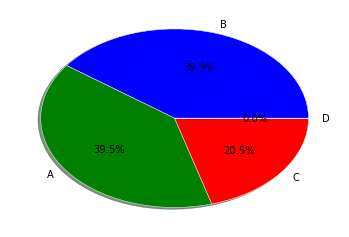

In [5]:
reason_cancelation = df['CancellationCode'].dropna(how = 'any').value_counts() # Отбрасываем рейсы без информации
reason_cancelation = reason_cancelation.astype(float) # Переводим в float для подсчета процентного соотношения
x = reason_cancelation.sum()
for i in range(len(reason_cancelation)):
    reason_cancelation[i] = float(reason_cancelation[i]/x)
labels = list(reason_cancelation.keys())
plt.pie(reason_cancelation, labels = labels, autopct = '%1.1f%%', shadow=True)
plt.show()

**Задание 3:** Найти самый популярный маршрут, выдать статистику по данному маршруту.

In [6]:
most_popular = list(df.groupby(['Origin','Dest'])['Year'].count().sort_values(ascending=False)[:1].keys())
print(most_popular[0][0] + '-' + most_popular[0][1]) # Самый популярный маршрут
df[(df['Origin'] == most_popular[0][0]) & (df['Dest'] == most_popular[0][1])].describe()

SFO-LAX


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,13788,13788.000000,13788.000000,13788.000000,13299.000000,13788.000000,13286.000000,13788.000000,13788.000000,13285.000000,...,13788,13286.000000,13299.000000,13788.000000,13788.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,2008,6.337322,15.730418,3.862997,1371.032408,1356.596388,1481.378820,1493.550116,1862.825573,82.417840,...,337,9.912163,17.273554,0.035466,0.001015,9.689688,0.360280,7.630808,0.026416,42.157225
std,0,3.358147,8.791381,1.973866,489.328348,472.940974,502.009856,473.465680,1999.167552,10.184247,...,0,5.120369,7.126813,0.184960,0.031850,27.959199,8.216006,16.685259,1.009160,46.774688
min,2008,1.000000,1.000000,1.000000,3.000000,540.000000,1.000000,5.000000,4.000000,58.000000,...,337,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008,3.000000,8.000000,2.000000,941.000000,945.000000,1054.000000,1110.000000,817.000000,75.000000,...,337,7.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,2008,6.000000,16.000000,4.000000,1355.000000,1315.000000,1507.000000,1443.000000,1153.000000,81.000000,...,337,9.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,28.000000
75%,2008,9.000000,23.000000,5.000000,1809.000000,1756.000000,1919.000000,1920.000000,1957.000000,88.000000,...,337,12.000000,20.000000,0.000000,0.000000,7.000000,0.000000,11.000000,0.000000,64.000000
max,2008,12.000000,31.000000,7.000000,2400.000000,2240.000000,2400.000000,2359.000000,7815.000000,196.000000,...,337,106.000000,84.000000,1.000000,1.000000,339.000000,406.000000,401.000000,54.000000,373.000000


**Задание 4:** Найти топ-5 рейсов по каждому из типов delay. Каким перевозчикам они принадлежат?

<b>Часть 1: </b>топ-5 рейсов по каждому из типов delay

In [7]:
priznaki = ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
# 1. Группировка по Flight Num
# 2. Иттерируемся по колонке "Flight Num"
# 3. Сгруппированные объекты суммируем и получаем для каждого FlightNum количество некоторого типа Delay
# 4. Сортировка и вывод ключей, у которых сумма (количество Delay) - наибольшие
most = np.array( ( [list(df.groupby(by = 'FlightNum')[x].sum().sort_values(ascending=False)[:5].keys()) for x in priznaki]))
most_delay = pd.DataFrame(most.T,[x for x in range(1,6)],columns = priznaki) # Запись результатов в одну таблицу
most_delay

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1,73,539,378,52,52
2,12,5685,524,1256,29
3,36,5257,7,2877,527
4,21,648,16,467,547
5,283,653,75,167,50


<b>Часть 2: </b>Функция, которая задает каким перевозчикам принадлежат номера рейсов - в виде функции carrier(x)

In [8]:
def carrier(x):
    return df[df['FlightNum'] == x]['UniqueCarrier'].unique()
# Интересуют, каким перевозчикам принадлежит Топ-1 по Carrier Delay
print(carrier(most_delay.at[1,'CarrierDelay']))

['WN' 'XE' 'UA' 'US' 'DL' 'FL' 'AA' 'AQ' 'AS' 'B6' 'CO']


<b>Все перевозчики, которым принадлежат соответствующие рейсы</b>

In [9]:
# Записываем перевозчиков в Series для подсчета статистики по количеству попаданий перевозчиков в какую-либо категорию
analiz = pd.Series()
for x in most_delay.columns.values: # Вытащим все типы Delay
    print(x) # Запринтим их
    for i in range(1,6):
        print(most_delay.at[i,x], carrier(most_delay.at[i,x]), sep = '   ') # Вывод всех номеров рейсов и перевозчиков с помощью carrier(x)
        analiz = analiz.append(pd.Series(carrier(most_delay.at[i,x]))) # Добавим перевозчиков в отдельный Series для анализа
itog_1 = analiz.value_counts()/analiz.shape # Найдем, какова доля перевозчиков в совокупности всех авиакомпаний, попадающих в top delay
analiz = itog_1[:5] # Заносим в наш analiz Series топ-5 перевозчиков по всем Delay
itog_2 = itog_1[5:].sum() 
analiz['others'] = itog_2 # А теперь оставшихся
analiz

CarrierDelay
73   ['WN' 'XE' 'UA' 'US' 'DL' 'FL' 'AA' 'AQ' 'AS' 'B6' 'CO']
12   ['WN' 'XE' 'UA' 'US' 'DL' 'HA' 'AS' 'B6' 'CO' 'FL']
36   ['WN' 'UA' 'DL' 'HA' 'B6' 'CO' 'FL' 'AS']
21   ['WN' 'XE' 'UA' 'US' 'FL' 'HA' 'AA' 'AS' 'B6']
283   ['WN' 'UA' 'US' 'F9' 'NW' 'AA' 'AS' 'FL' 'CO' 'B6']
WeatherDelay
539   ['WN' 'UA' 'DL' 'F9' 'FL' 'NW' 'AA' 'AS' 'CO']
5685   ['OH' '9E' 'EV']
5257   ['OH' 'EV']
648   ['WN' 'UA' 'US' 'DL' 'FL' 'NW' 'AA' 'B6' 'CO' 'AS']
653   ['WN' 'UA' 'F9' 'NW' 'US' 'DL' 'AA' 'AS' 'FL']
NASDelay
378   ['WN' 'UA' 'F9' 'FL' 'HA' 'NW' 'AA' 'AS' 'B6' 'CO' 'US']
524   ['WN' 'XE' 'UA' 'US' 'DL' 'FL' 'NW' 'AA' 'AS' 'B6' 'CO' 'HA']
7   ['WN' 'UA' 'US' 'HA' 'AA' 'AS' 'B6' 'CO' 'DL' 'FL']
16   ['WN' 'XE' 'UA' 'US' 'DL' 'HA' 'AA' 'AS' 'B6' 'CO' 'FL']
75   ['WN' 'UA' 'US' 'DL' 'FL' 'AA' 'AS' 'B6']
SecurityDelay
52   ['WN' 'UA' 'US' 'FL' 'B6' 'CO' 'AS' 'DL']
1256   ['WN' 'UA' 'US' 'NW' 'AA' 'B6' 'DL' 'XE']
2877   ['WN' 'XE' 'YV' '9E' 'OO']
467   ['WN' 'UA' 'DL' 'NW' 'AQ' 'AS' 'B6' 

WN        0.105991
UA        0.101382
FL        0.096774
B6        0.092166
AS        0.092166
others    0.511521
dtype: float64

<b>Перевозчики наиболее "некачественных" рейсов в виде диаграммы</b>

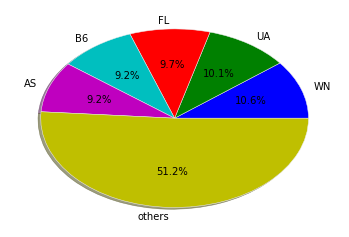

In [10]:
labels = list(analiz.keys())
plt.pie(analiz, labels = labels, autopct = '%1.1f%%', shadow=True)
plt.show()

**Задание 5:** Определить, как распределено количество рейсов от времени дня?

<b style = "font-size:18px;"><i>Везде далее рассмотрим все рейсы по запланированному расписанию:</i></b>

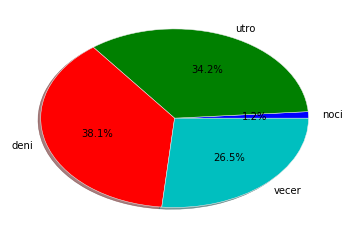

In [11]:
tr = df['CRSArrTime']
tr_1 = df['CRSDepTime']
noci = df['CRSArrTime'][(tr >= 0) & (tr <= 559)].count() + df['CRSDepTime'][(tr_1 >= 0) & (tr_1 <= 559)].count() 
utro = df['CRSArrTime'][(tr >= 600) & (tr <= 1159)].count() + df['CRSDepTime'][(tr_1 >= 600) & (tr_1 <= 1159)].count() 
deni = df['CRSArrTime'][(tr >= 1200) & (tr <= 1759)].count() + df['CRSDepTime'][(tr_1 >= 1200) & (tr_1 <= 1759)].count() 
vecer = df['CRSArrTime'][(tr >= 1800) & (tr <= 2400)].count() + df['CRSDepTime'][(tr_1 >= 1800) & (tr_1 <= 2400)].count()
plt.pie([noci,utro,deni,vecer], labels = ['noci','utro','deni','vecer'], autopct = '%1.1f%%', shadow=True);
plt.show()

**Задание 6:** Определить "сезонность" во временных рядах по количеству вылетов на каждый день.

1) Попробуем найти закономерность между днем месяца и количеством вылетов, отбросив 31 число (не во всех месяцах встречается)

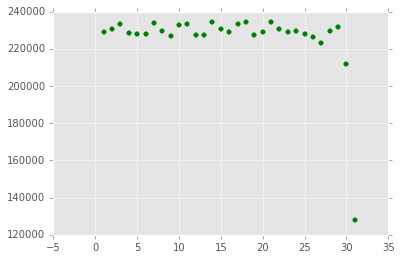

In [12]:
result_day_of_month = df['DayofMonth'].value_counts()
plt.scatter(list(result_day_of_month.keys()),result_day_of_month, color = 'green')

<b> Нет никакой зависимости </b> <br/> <br/> Проверим теперь дни недели на закономерность

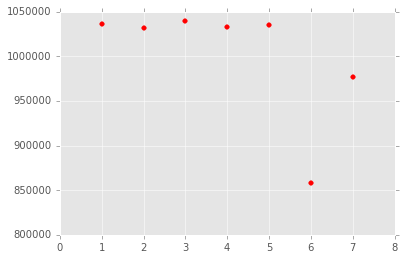

In [13]:
result_day_of_week = df['DayOfWeek'].value_counts()
plt.scatter(list(result_day_of_week.keys()),result_day_of_week, color = 'red')

<b> Вывод: чаще летают по будням </b> <br/> Определим теперь закономерность, связанную с временем года

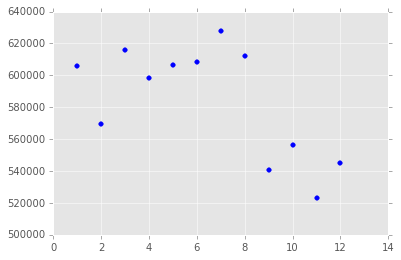

In [14]:
result_season = df['Month'].value_counts()
plt.scatter(list(result_season.keys()),result_season, color = 'blue')

<b>Вывод: чаще всего летают весной и летом, реже осенью и зимой.</b> <br/>
Продемонстрируем наглядно:

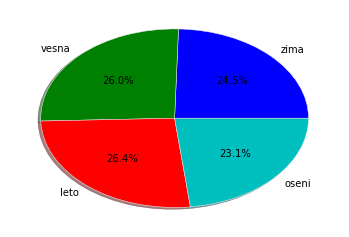

In [15]:
# Сделаем так, чтобы номер индекса в массиве совпадал с номером месяца
result_season[0] = 'NaN' # Так как нет нулевого месяца
result_season = result_season.sort_index() 
zima = result_season[1]+result_season[12]+result_season[2]
vesna = result_season[3:6].sum()
leto = result_season[6:9].sum()
oseni = result_season[9:12].sum()
plt.pie([zima,vesna,leto,oseni], labels = ['zima','vesna','leto','oseni'], autopct = '%1.1f%%', shadow=True)
plt.show()

### 2. Продолжаем изучать Pandas

Ввиду ограниченности времени, мы не успеваем рассмотреть всё на семинарах. Поэтому часть работы ложится на вас..

Загрузите две csv таблицы [отсюда](https://github.com/emorisse/FBI-Hate-Crime-Statistics) и импортируйте через Pandas. В них содержатся агрегированные данные по различным организациям\городам США, содержащие количество обращений по тем или иным случаям нарушения закона. В одной таблице (table13.csv) перечислены управления, которые сообщали об этих случаях, в другой - которые не сообщали.

**Задание 1:** Изучите документации для методов `unique_values`, `isin`. С помощью этой функции, определите, содержатся ли в двух таблицах одни и те же штаты.

In [16]:
df_yes = pd.read_csv('table13.csv')
df_no = pd.read_csv('table14.csv')

In [17]:
# Если нет False, то множество штатов соответствующей таблицы содержат все штаты другой таблицы
print('table13', df_no['State'].drop_duplicates().isin(df_yes['State'].unique()).value_counts(), sep = '\n', end = '\n\n')
print('table14', df_yes['State'].drop_duplicates().isin(df_no['State'].unique()).value_counts(), sep = '\n')

table13
True    48
Name: State, dtype: int64

table14
True     48
False     2
Name: State, dtype: int64


<b>Вывод: все штаты таблицы table14 содержатся в другой таблице, но не наоборот </b>

**Задание 2:** Изучите документации для методов `append`, `merge` и `concat`. Совместите две таблицы в одну.

Используем append:

In [18]:
df_big = df_yes.append(df_no, ignore_index=True)
df_big

,1st quarter,2nd quarter,3rd quarter,4th quarter,Agency Name,Agency Type,Agency name,Agency type,Disability,Ethnicity,...,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation,State
0,0,1,0,1,NaN,NaN,Florence,Cities,0,0,...,0,"39,481",NaN,NaN,NaN,NaN,2,0,0,Alabama
1,0,1,0,0,NaN,NaN,Hoover,Cities,0,0,...,0,"84,139",NaN,NaN,NaN,NaN,0,0,1,Alabama
2,1,0,1,0,NaN,NaN,Prattville,Cities,0,0,...,0,"35,154",NaN,NaN,NaN,NaN,2,0,0,Alabama
3,0,0,1,0,NaN,NaN,Tuscaloosa,Cities,0,0,...,0,"94,126",NaN,NaN,NaN,NaN,1,0,0,Alabama
4,2,3,3,0,NaN,NaN,Anchorage,Cities,0,0,...,0,"299,455",NaN,NaN,NaN,NaN,8,0,0,Alaska
5,1,0,0,NaN,NaN,NaN,Apache Junction,Cities,0,0,...,0,"36,626",NaN,NaN,NaN,NaN,1,0,0,Arizona
6,1,1,3,0,NaN,NaN,Avondale,Cities,0,1,...,0,"78,905",NaN,NaN,NaN,NaN,4,0,0,Arizona
7,0,1,0,0,NaN,NaN,Eagar,Cities,0,1,...,0,"5,034",NaN,NaN,NaN,NaN,0,0,0,Arizona
8,0,0,1,0,NaN,NaN,El Mirage,Cities,0,0,...,0,"32,837",NaN,NaN,NaN,NaN,1,0,0,Arizona
9,1,0,0,0,NaN,NaN,Gilbert,Cities,0,0,...,0,"225,232",NaN,NaN,NaN,NaN,1,0,0,Arizona


**Задание 3:** Изучите документации для методов `drop_dublicates` и `dropna`. Используйте метод `dropna` для очистки большой таблицы от пропусков. Что произошло? Почему? Исправьте таблицы, чтобы получить корректный ответ.

In [19]:
df_big.dropna(how = "any")


,1st quarter,2nd quarter,3rd quarter,4th quarter,Agency Name,Agency Type,Agency name,Agency type,Disability,Ethnicity,...,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation,State


<i>Все удалилось, т.к. при объединении таблиц, у обеих таблиц были колонки, которых не было в другой таблице</i>

In [20]:
df_no_concat = df_no.copy() # Подготовка таблицы table14 для ее присоединения к table 14
# Присвоение колонкам table 14 имен, которые соответствуют по смыслу именам table13
df_no_concat.columns = ['State','Agency type','Agency name','1st quarter','2nd quarter','3rd quarter','4th quarter','Population']
# Записываем результат слияния в DataFrame df_3
df_3 = df_yes.append(df_no_concat, ignore_index=True)
# Приходится последовательно обрабатывать две части полученного DataFrame в связи с тем, что все множество колонок
# table 13 не содержится в множестве колонок table 14. Поэтому обработаем сначала часть df_3, связанной с table 13
df_3[:df_yes.shape[0]] = df_3[:df_yes.shape[0]].dropna(how = "any")
# Теперь обработаем колонки таблицы table 14
df_3 = df_3.dropna(subset = df_no_concat.columns.values)
# Проверочка
if df_yes.dropna(how = "any").shape[0] + df_no.dropna(how = "any").shape[0] != df_3.shape[0]:
    print(';(')
else:
    print(':))')
df_3

:))


,1st quarter,2nd quarter,3rd quarter,4th quarter,Agency name,Agency type,Disability,Ethnicity,Gender,Gender Identity,Population,Race,Religion,Sexual orientation,State
0,0,1,0,1,Florence,Cities,0,0,0,0,"39,481",2,0,0,Alabama
1,0,1,0,0,Hoover,Cities,0,0,0,0,"84,139",0,0,1,Alabama
2,1,0,1,0,Prattville,Cities,0,0,0,0,"35,154",2,0,0,Alabama
3,0,0,1,0,Tuscaloosa,Cities,0,0,0,0,"94,126",1,0,0,Alabama
4,2,3,3,0,Anchorage,Cities,0,0,0,0,"299,455",8,0,0,Alaska
6,1,1,3,0,Avondale,Cities,0,1,0,0,"78,905",4,0,0,Arizona
7,0,1,0,0,Eagar,Cities,0,1,0,0,"5,034",0,0,0,Arizona
8,0,0,1,0,El Mirage,Cities,0,0,0,0,"32,837",1,0,0,Arizona
9,1,0,0,0,Gilbert,Cities,0,0,0,0,"225,232",1,0,0,Arizona
10,2,0,3,2,Glendale,Cities,0,1,0,0,"234,006",2,3,1,Arizona


**Задание 4:** Изучите документации для методов `set_index`, `reset_index` и `pivot_table`. Проиндексируйте общую таблицу по переменным State и Agency Type (одновременно). У вас должен появиться *мультииндекс*.

In [21]:
df_3 = df_3.set_index(['State','Agency type'])

**Задание 5:** В Pandas можно идерировать по DataFrame! Ищучите документации для методов `iteritems`, `iterrows`, а так же посмотрите, как можно итерировать по сгруппированным DataFrame'ам. Выделите подтаблицу, состаящую из данных по 3 произвольным штатам и сгруппируйте её по переменным State и Agency Type. С помощью изученных методов (то есть итеративно) выведите суммарную популяцию по каждой паре <Штат>-<Тип>

<b> Обработка Population, приведение данных в формат float</b>

In [22]:
# Шаг №1: Определение всех элементов, составляющих данные Population
simboli = set()
for i in df_3['Population']:
    try:
        int(i)
    except ValueError:
        for y in i:
            simboli.add(y)
# Отсеивание из множества - цифр, определяя, какие символы не позволяют перевести столбец в int:
simboli = simboli - {'0','1','2','3','4','5','6','7','8','9'}
print(simboli)
# Вывод: в колонке используются запятые для отделения порядков. Уберем запятые с помощью функции tofloat
def tofloat(x):
    x = str(x)
    result = ''
    for i in x:
        if i != ',':
            result += i
    return result
df_3['Population'] = df_3['Population'].apply(tofloat) # Тип string, но без запятых
df_3['Population'] = df_3['Population'].astype(int) # Теперь можно переводить в int

{','}


In [23]:
df_4 = df_3.loc[(df_3.index.get_level_values('State') == 'Alaska') |\
                (df_3.index.get_level_values('State') == 'Arkansas')|
                 (df_3.index.get_level_values('State') == 'Washington'),:]
df_4.groupby(level=['State','Agency type'])['Population'].sum()

State       Agency type              
Alaska      Cities                        473880
            Universities and Colleges      26720
Arkansas    Cities                       1718697
            Universities and Colleges      91341
Washington  Cities                       4108964
            Universites and Colleges       15777
            Universities and Colleges      98584
Name: Population, dtype: int64

## 3. Метод градиентного спуска

Напомним суть метода градиентого спуска в контексте задачи линейной регрессии.

Дано описание $n$ объектов по $m$ признакам. Обычно оно выражается в виде матрицы размера $n \times m$: $X = [x^{(i)}_j]^{i=1\dots n}_{j=1\dots m} $.<br\> ($x^{(i)}_j$ означает $j$-ый признак $i$-го объекта) <br\>
Дана зависимая переменная, которая тоже имеет отношение к этим объекам: $y$ - вектор длины $n$.

Наша задача, выявить **линейную** зависимость между признаками в $X$ и значениями в $y$:
$$\hat{y} = X\beta \quad \Leftrightarrow \quad \hat{y}^{(i)} = \beta_0 + \beta_1x^{(i)}_1 + \dots$$

И сделать это так, чтобы квадрат суммы ошибок наших оценок был минимален:
$$ L(\beta) = \frac{1}{2n}(\hat{y} - y)^{\top}(\hat{y} - y) = \frac{1}{2n}(X\beta - y)^{\top}(X\beta - y) \rightarrow \min$$ $$ \Updownarrow $$  $$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 + \dots - y^{(i)})^2  \rightarrow \min $$

Значение в $X$ и $y$ нам даны. Нам неизвестны только значения коэффициентов $\beta$.<br\> Соответственно, нужно найти такие значения $\beta$, что функция $L(\beta) \rightarrow \min.$

На семинаре мы выяснили, чему равен градиент функции потерь $L(\beta_0, \beta_1):$
$$ \frac{\partial L}{\partial \beta_0} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})$$
$$ \frac{\partial L}{\partial \beta_1} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})x_1^{(i)}$$

Иногда проще это записать в виде матриц:
$$ \frac{\partial L}{\partial \beta} = X^\top(X\beta - y)$$


Метод градиентного спуска заключается в итеративном и **одновременном(!!!)** обновлении значений $\beta$ в направлении, противоположному градиенту:
$$ \beta := \beta - \alpha\frac{\partial L}{\partial \beta}$$

**Задача 1:** Загрузите [данные](http://bit.ly/1gIQs6C) по характеристикам автомобилей Honda Accord. Названия столбцов говорят сами за себя.

Составьте матрицу $X$, состоящую из единичного столбца и признака "пробег". <br\>
Составьте вектор $y$ состоящий из стоимости автомобиля.

Если для импорта вы используете `pandas`, то через .values из DataFrame можно получить numpy array.

In [24]:
df_honda = pd.read_csv('accord_sedan_training.csv')
X = np.array([[1]*df_honda.shape[0],df_honda['mileage']]).T
y = np.array(df_honda['price'])

**Задача 2:** Изобразите функционал квадратичной ошибки $L(\beta_0, \beta_1)$ в 3D и его линии уровня

In [25]:
# Представление функции L в символьном виде
from sympy import *
b1 = sympy.Symbol('b1')
b2 = sympy.Symbol('b2')
beta = np.array([b1,b2])
oshibki = X.dot(beta) - y # Для получения L необходимо сложить строки, возведенные в квадрат
qadr_oshibka = 0 
for i in oshibki:
    qadr_oshibka += i**2
qadr_oshibka = qadr_oshibka/(oshibki.shape[0]) # Функция L(b0,b1)
# Построение функции по точкам x y с помощью lambdify
bb1 = np.linspace(12000, 20000, 500)
bb2 = np.linspace(-0.07, -0.03, 500)
BB1, BB2 = np.meshgrid(bb1,bb2)
f = lambdify([b1,b2],qadr_oshibka,"numpy") 
result_plot = f(BB1,BB2) 

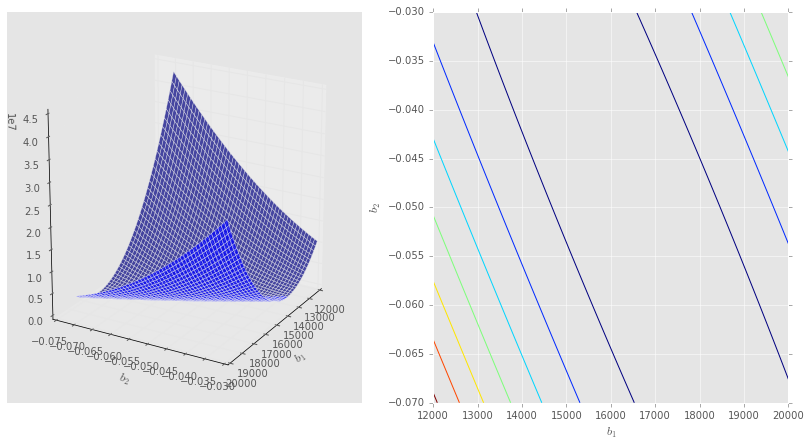

In [26]:
fig = plt.figure(figsize=(14, 7)) 
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.view_init(20, 30)
ax.plot_surface(BB1,BB2,result_plot, alpha=0.7)
# ax.plot_(X, Y, Z)
ax.set_xlabel('$b_1$')
ax.set_ylabel('$b_2$')

ax = fig.add_subplot(1, 2, 2) 
contour = ax.contour(BB1, BB2, result_plot) 
ax.set_xlabel('$b_1$')
ax.set_ylabel('$b_2$')

**Задача 3:** Напишите код, реализующий метод градиентного спуска. На вход метод должен принимать исходные данные, максимальное кол-во итераций и коэффициент скорости спуска.

In [27]:
# Наши условия первого порядка
f_der_b1 = qadr_oshibka.diff(b1) 
f_der_b2 = qadr_oshibka.diff(b2) 
f_der_b1

2*b1 + 74831300*b2/417 - 10078258/417

In [28]:
def grad_spusk(function, iter_max, alpha):
    f_1 = function[0] 
    f_2 = function[1] 
    alpha1 = alpha[0]
    alpha2 = alpha[1] # Две скорости спуска в связи с высоким ожидаемым расбросом(из графика) значений координат b1 и b2 в мин
    old_min_1 = 1
    old_min_2 = 1
    temp_min_1 = 10
    temp_min_2 = 3
    precision = 0.01 # требуемая точность
    i = 0
    while (abs(temp_min_1 - old_min_1) > precision or abs(temp_min_2 - old_min_2) > precision) and i < iter_max :
        old_min_1 = temp_min_1
        old_min_2 = temp_min_2
        # новая переменная temp_min_1_1, чтобы новое полученное значение temp_min_1 не подставлялось в градиент при подсчете temp_min_2
        temp_min_1_1 = temp_min_1 - alpha1*f_1(temp_min_1,temp_min_2) 
        temp_min_2 = temp_min_2 - alpha2*f_2(temp_min_1,temp_min_2)
        temp_min_1 = temp_min_1_1
        i+=1
    return [temp_min_1, temp_min_2]

**Задача 4:** Выведите полученные значения коэфициентов $\beta$. <br\>Как они интерпретируются?  <br\>Изобразите на одном графике $[y - \text{"пробег"}]$ точки и полученную прямую.

<b> Выведем полученные значения $\beta$ </b>

In [29]:
beta = grad_spusk([lambdify([b1,b2],f_der_b1), lambdify([b1,b2],f_der_b2)], 1000000, [0.00038, 0.00000000002745])
print(beta)

[16591.04401712895, -0.050375249000602904]


Эти коэффиценты интерпретируется следующим образом: при увелечении пробега на 1 - его цена падает на $\beta_2 \approx 0,05$

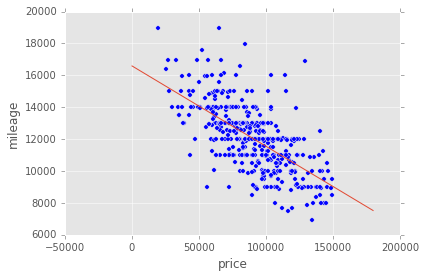

In [30]:
x_prob = np.array([[1,0],[1,180000]])
y_hat = x_prob.dot(beta)
plt.scatter(X.T[1], y)
plt.xlabel('price')
plt.ylabel('mileage')
plt.plot(x_prob[:,1], y_hat)